# Fourier Transforms

Read https://plus.maths.org/content/fourier-transforms-images



*Summary*: Let, $I_i = a\times sin(hx+ky)$. 

If the image is a sum of $ I_i's $, then the fourier transform image would represent the $h_i$ and the $k_i$ for $I_i$ with the center as (0,0). The pixel intensity of the fourier transform represents the amplitude of $I_i$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

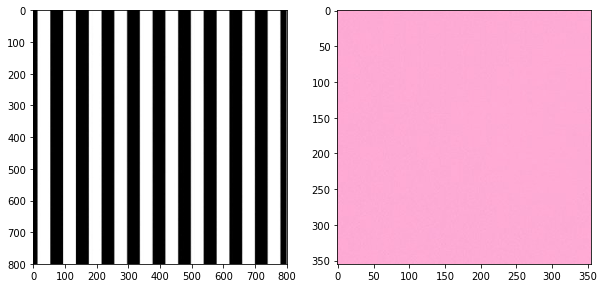

In [5]:
image_stripes = cv2.imread('images/stripes.jpg')
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

image_solid = cv2.imread('images/pink_solid.jpg')
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)


f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [9]:
# Convert to grayscale and normalize
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0


def fourier_transform(norm_image):
    """ This function takes in a normalized, grayscale image
        and returns a frequency spectrum transform of that image.
    """

    f = np.fft.fft2(norm_image) # numpy fourier transform
    fshift = np.fft.fftshift(f) # Shift the zero-frequency component to the center of the spectrum.
    frequency_tx = 20*np.log(np.abs(fshift))

    return frequency_tx

In [10]:
# Perform Fourier Transform
f_stripes = fourier_transform(norm_stripes)
f_solid = fourier_transform(norm_solid)

# display the images
# original images to the left of their frequency transform
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')

Here, for the first image, the frequency is high in the x-direction, but low in y-direction. Hence, the sine waves would have high amplitudes for all h,k where k=0. (center of image)

For the second image, the amplitude is highest for h=0 and k=0, which is expected as its a plain uniform image, hence 0 frequency. 

Note: a square wave consists of all frequencies from 0 to infinity